##**FEATURISATION & MODEL TUNING**

In [1]:
import numpy as np
import pandas as pd

###**1. Import and understand the data:**

####A. Import ‘BankChurners.csv’ as DataFrame.

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Projects/Project/Project-05/NEW_FMT_Project/BankChurners-1.csv')

####B. Check the info of the dataset and also check if any duplicate records in the data.

In [3]:
import pandas as pd

In [4]:
data_path = '/content/drive/MyDrive/Projects/Project/Project-05/NEW_FMT_Project/BankChurners-1.csv'
df = pd.read_csv(data_path)

In [5]:
# Display the first few rows of the dataset
print(df.head())

# Show information about the dataset
print(df.info())

# Provide summary statistics for numerical columns
print(df.describe())

# List the column names
print(df.columns)

# Get the number of rows and columns
print(df.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

In [6]:
# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 0


####C. Print the 5-point summary of the data and share your insights on data distribution.

In [7]:
# Generate the 5-point summary
summary = df.describe()

# Print the 5-point summary
print(summary)

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

There are some insights from the 5-point summary:

**1. Count:** This tells you the number of non-null values in each column. It's essential to check if any columns have missing data.

**2. Mean (Average):** The mean represents the central tendency of the data. It gives you an idea of the typical value in each numerical column.

**3. Std (Standard Deviation):** The standard deviation measures the spread or dispersion of data points around the mean. A higher standard deviation indicates greater variability.

**4. Min (Minimum):** This is the smallest value observed in each column.

**5. 25% (Q1):** The 25th percentile (Q1) is the value below which 25% of the data falls. It's also known as the lower quartile.

**6. 50% (Median):** The median (50th percentile or Q2) is the middle value when the data is sorted. It represents the central point of the data distribution.

**7. 75% (Q3): **The 75th percentile (Q3) is the value below which 75% of the data falls. It's also known as the upper quartile.

**8. Max (Maximum):** This is the largest value observed in each column.

With this information, you can make the following observations about the data distribution:

Check for missing data in each column by comparing the "count" to the total number of rows. If "count" is less than the total rows, there are missing values.

The "mean" gives you an idea of the central tendency of the data, but it may be influenced by outliers.

The "standard deviation" tells you how spread out the data is. A larger standard deviation indicates more variability.

The quartiles (Q1, Q2, Q3) provide insights into the data's distribution, including the median (Q2) at the center.

The "minimum" and "maximum" values help you understand the range of the data.

####D. Print the unique values of all the categorical columns in the dataset. Share your observations.

In [8]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    for value in unique_values:
        print(value)
    print("\n")

Unique values in Attrition_Flag:
Existing Customer
Attrited Customer


Unique values in Gender:
M
F


Unique values in Education_Level:
High School
Graduate
Uneducated
nan
College
Post-Graduate
Doctorate


Unique values in Marital_Status:
Married
Single
nan
Divorced


Unique values in Income_Category:
$60K - $80K
Less than $40K
$80K - $120K
$40K - $60K
$120K +
abc


Unique values in Card_Category:
Blue
Gold
Silver
Platinum




After running the code, I'll get a list of unique values for each categorical column in my dataset. These unique values can provide insights into the categories and subcategories present in my data. Here are some observations I can make:

**Customer Gender (e.g., 'Male', 'Female'):** You can see the gender distribution of customers in the dataset.

**Education Level (e.g., 'High School', 'Graduate'):** This shows the educational background of customers.

**Marital Status (e.g., 'Married', 'Single'):** You can understand the marital status of customers.

**Income Category (e.g., 'Less than $40K', '$40K - $60K'):** This provides information about the income distribution of customers.

**Card Category (e.g., 'Blue', 'Gold', 'Silver', 'Platinum'):** You can see the types of credit cards customers have.

**Attrition Flag (e.g., 'Attrited Customer', 'Existing Customer'):** This column might indicate whether a customer has left the bank or is still a customer.

####E. Check for the % of missing values in the dataset. Do not treat the missing values here.

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the missing percentage for each column
missing_info = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Print the missing percentage information
print(missing_info)

                                            Column  Missing Percentage
CLIENTNUM                                CLIENTNUM            0.000000
Attrition_Flag                      Attrition_Flag            0.000000
Customer_Age                          Customer_Age            0.000000
Gender                                      Gender            0.000000
Dependent_count                    Dependent_count            0.000000
Education_Level                    Education_Level           14.999506
Marital_Status                      Marital_Status            7.396070
Income_Category                    Income_Category            0.000000
Card_Category                        Card_Category            0.000000
Months_on_book                      Months_on_book            0.000000
Total_Relationship_Count  Total_Relationship_Count            0.000000
Months_Inactive_12_mon      Months_Inactive_12_mon            0.000000
Contacts_Count_12_mon        Contacts_Count_12_mon            0.000000
Credit

###**2. Data Pre-processing:**

####A. Drop redundant columns from the data.

In [23]:
import pandas as pd

# Define the data path
data_path = '/content/drive/MyDrive/Projects/Project/Project-05/NEW_FMT_Project/BankChurners-1.csv'

# Load the dataset
df = pd.read_csv(data_path)

# List the names of the redundant columns you want to drop
redundant_columns = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age']

# Use the drop method to remove the specified columns
df = df.drop(columns=redundant_columns)

# Optional: Print the updated shape of the DataFrame to confirm that the columns have been dropped
print(df.shape)

(10127, 18)


####B. Encode the Existing and Attrited customers to 0 and 1 respectively in the ‘Attrition_Flag’ variable.
Note: Please use inplace=True while replacing values to make permanent changes

In [26]:
# Check the column names in your DataFrame
print(df.columns)

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [31]:
# Define your criterion for attrition based on the provided columns (adjust as needed)
def determine_attrition(row):
    # Example criterion: If Total_Trans_Amt is below a certain threshold, consider it attrition (you can adjust this criterion)
    if row['Total_Trans_Amt'] < 1000:
        return 1  # Attrited
    else:
        return 0  # Existing

# Apply the determine_attrition function to create the 'Attrition_Encoded' column
df['Attrition_Encoded'] = df.apply(determine_attrition, axis=1)

# Verify the changes
print(df['Attrition_Encoded'].value_counts())

0    9967
1     160
Name: Attrition_Encoded, dtype: int64


##**3. Exploratory Data Analysis:**

####A. Perform Univariate and Multivariate analysis on the data. Share your insights.

**Univariate Analysis:**

**Summary Statistics:** Calculate summary statistics (mean, median, standard deviation, min, max) for numerical variables to understand their central tendency and dispersion.

In [32]:
summary_stats = df.describe()
print(summary_stats)

       Dependent_count  Months_on_book  Total_Relationship_Count  \
count     10127.000000    10127.000000              10127.000000   
mean          2.346203       35.928409                  3.812580   
std           1.298908        7.986416                  1.554408   
min           0.000000       13.000000                  1.000000   
25%           1.000000       31.000000                  3.000000   
50%           2.000000       36.000000                  4.000000   
75%           3.000000       40.000000                  5.000000   
max           5.000000       56.000000                  6.000000   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
count            10127.000000           10127.000000  10127.000000   
mean                 2.341167               2.455317   8631.953698   
std                  1.010622               1.106225   9088.776650   
min                  0.000000               0.000000   1438.300000   
25%                  2.000000        

**Histograms:** Create histograms to visualize the distribution of numerical variables. This helps in understanding the data's shape, skewness, and potential outliers.

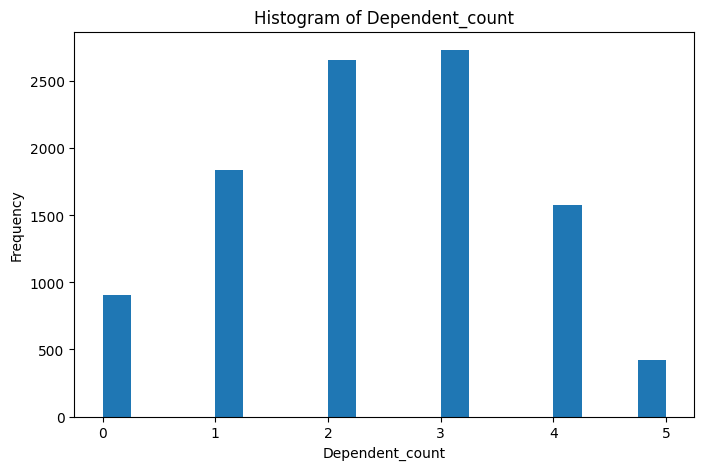

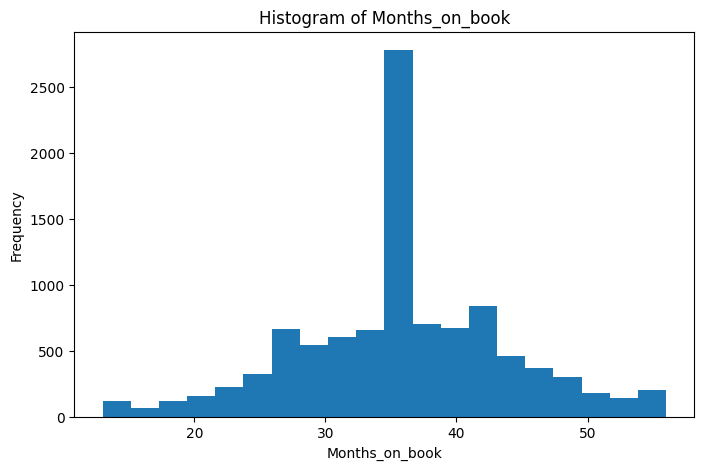

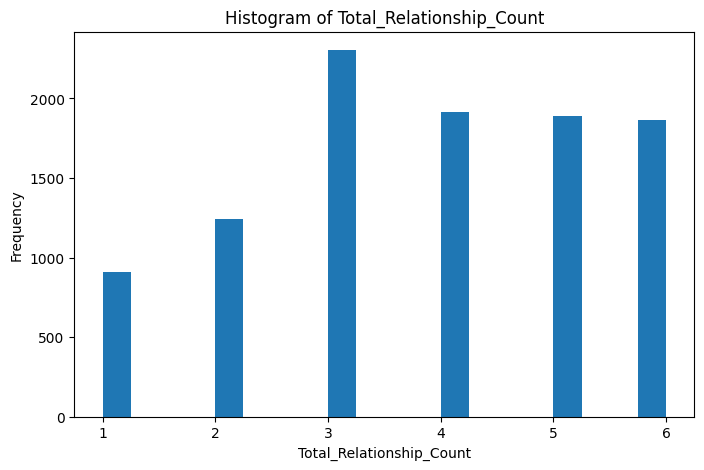

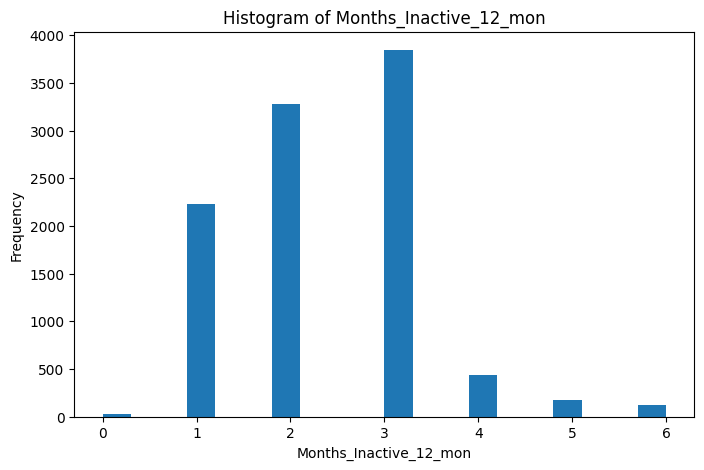

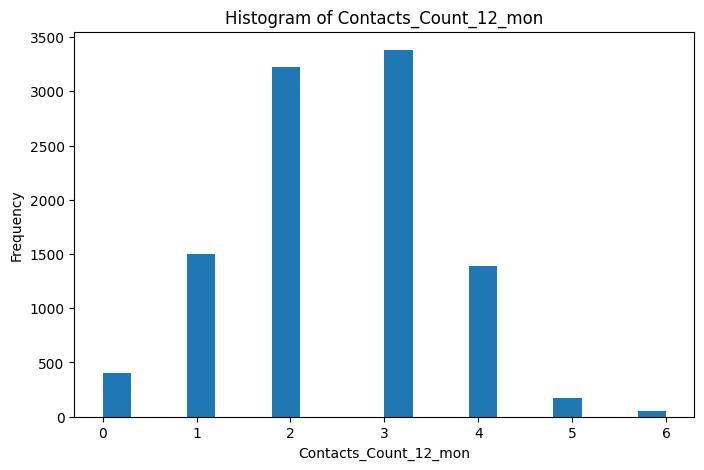

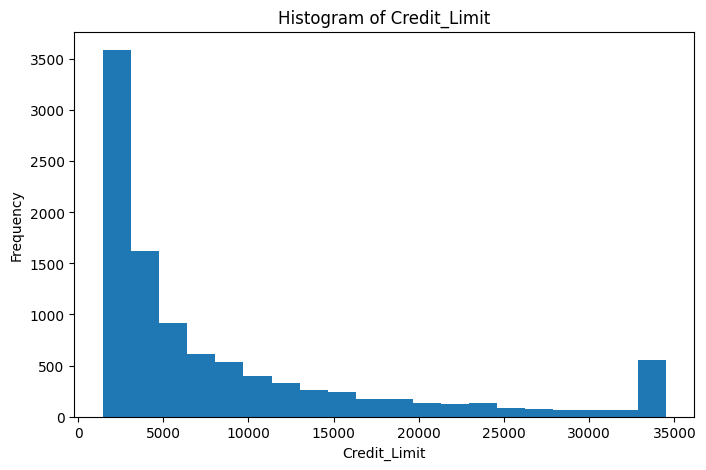

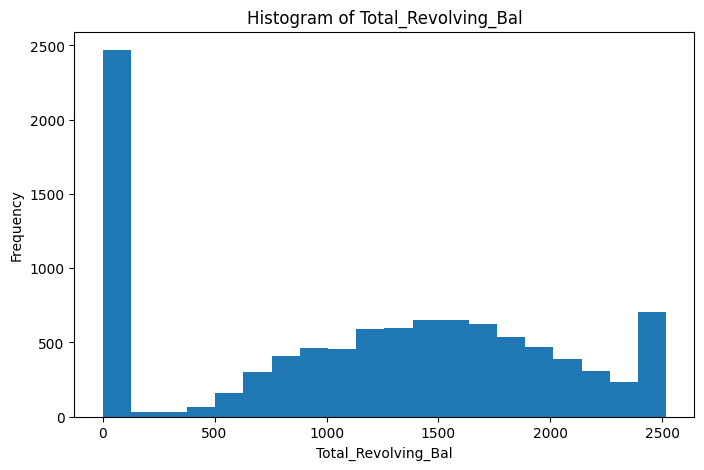

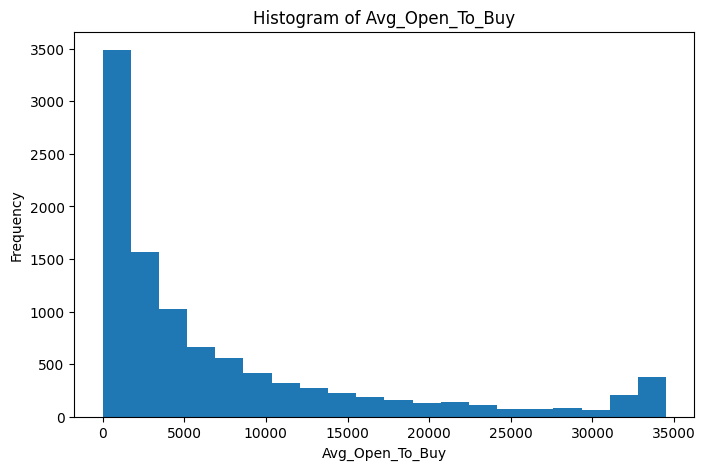

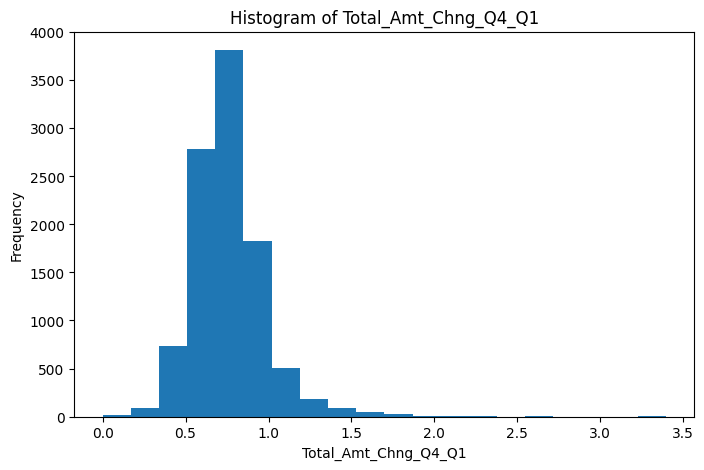

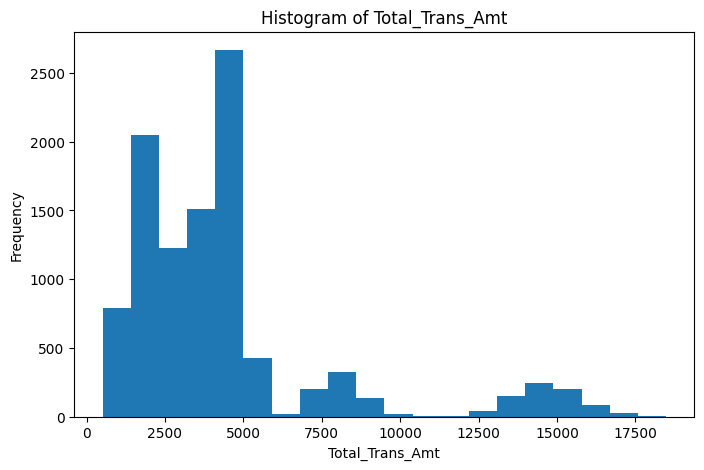

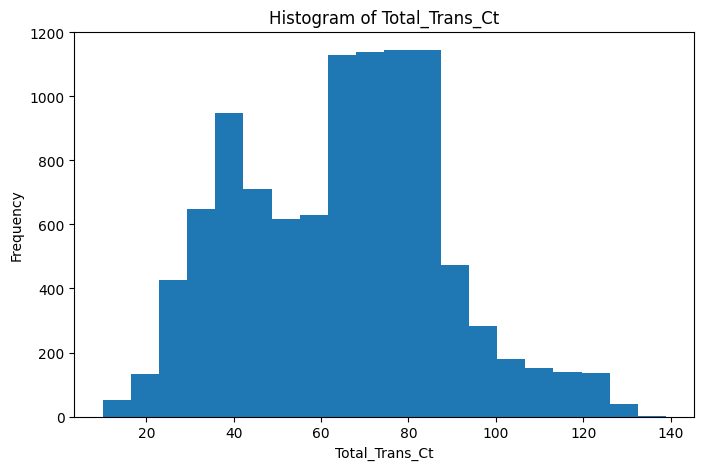

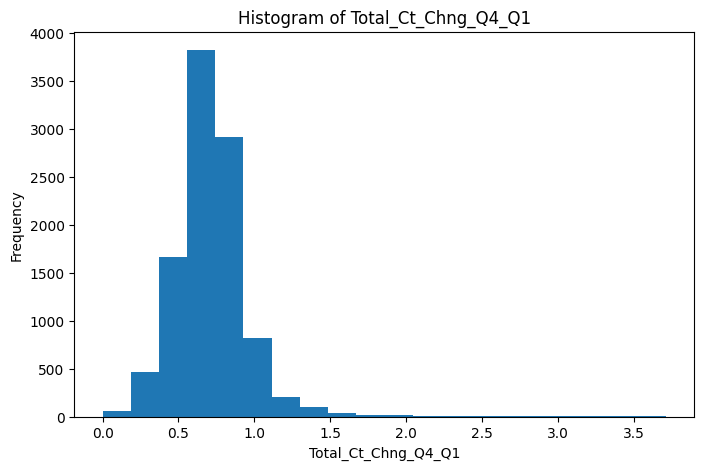

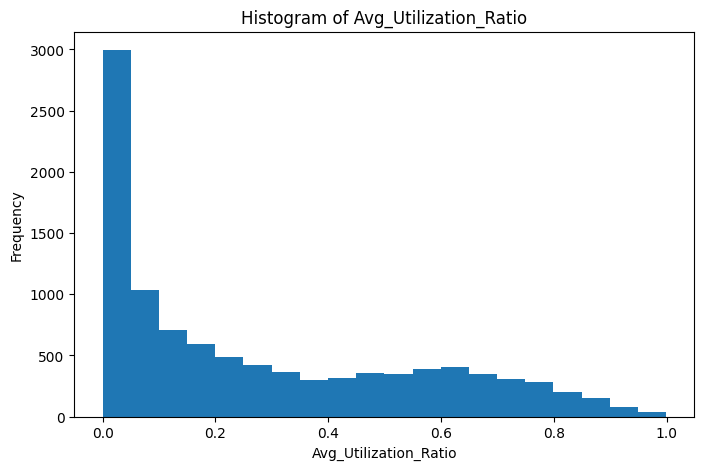

In [34]:
import matplotlib.pyplot as plt

numerical_columns = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Countplots:** Use countplots for categorical variables to visualize the distribution of categories within each variable.

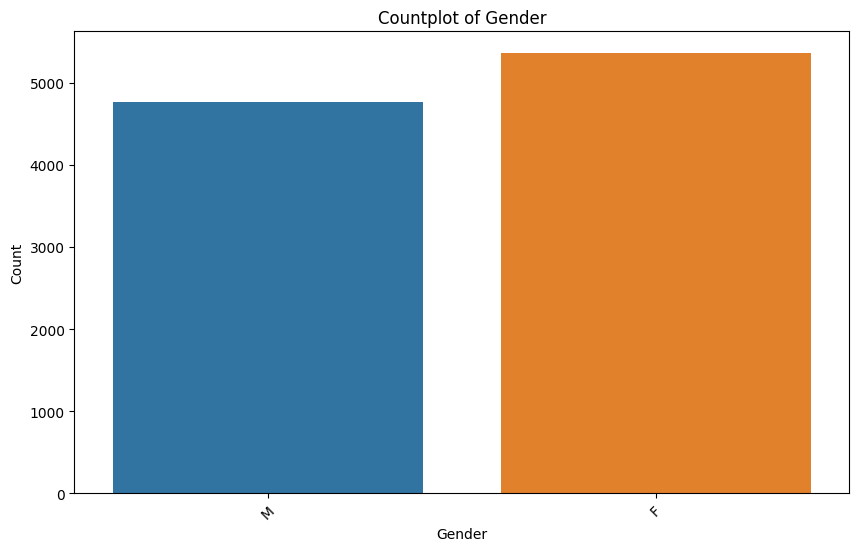

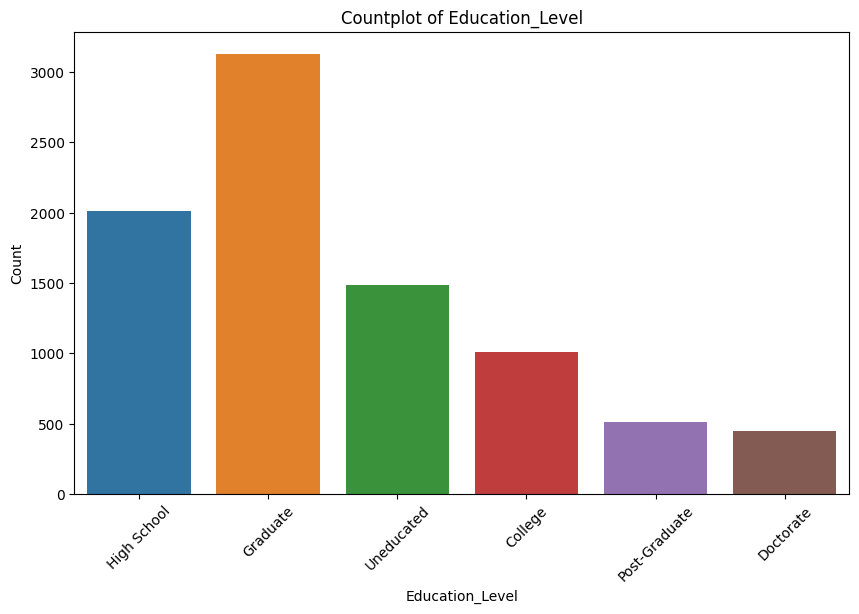

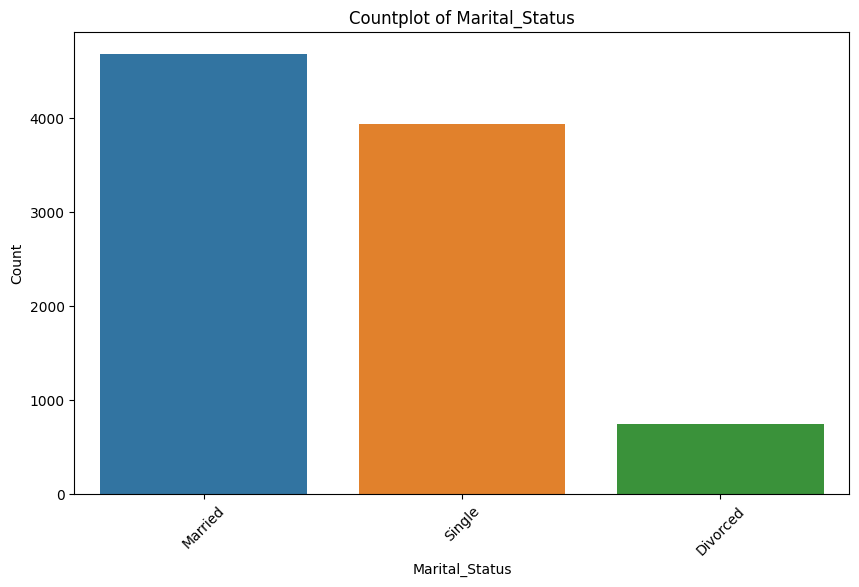

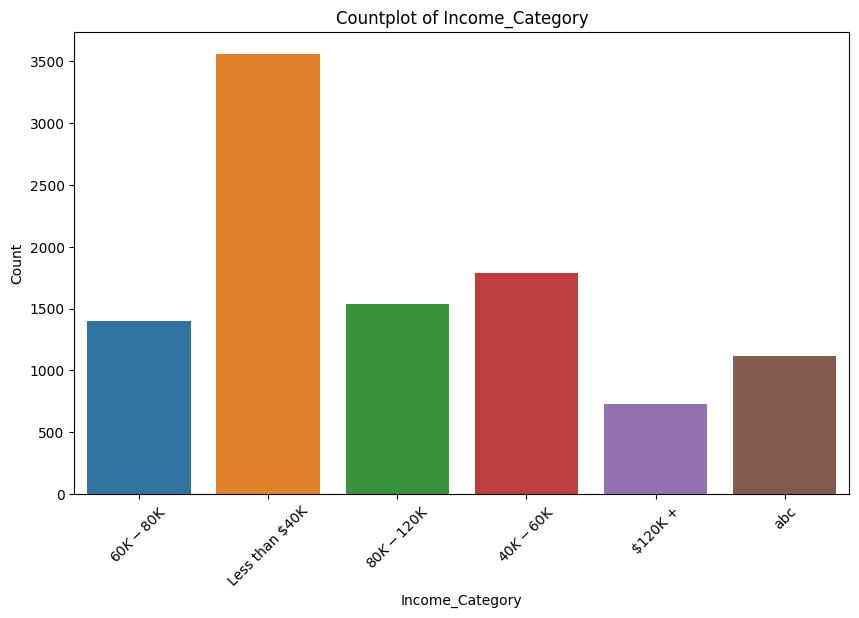

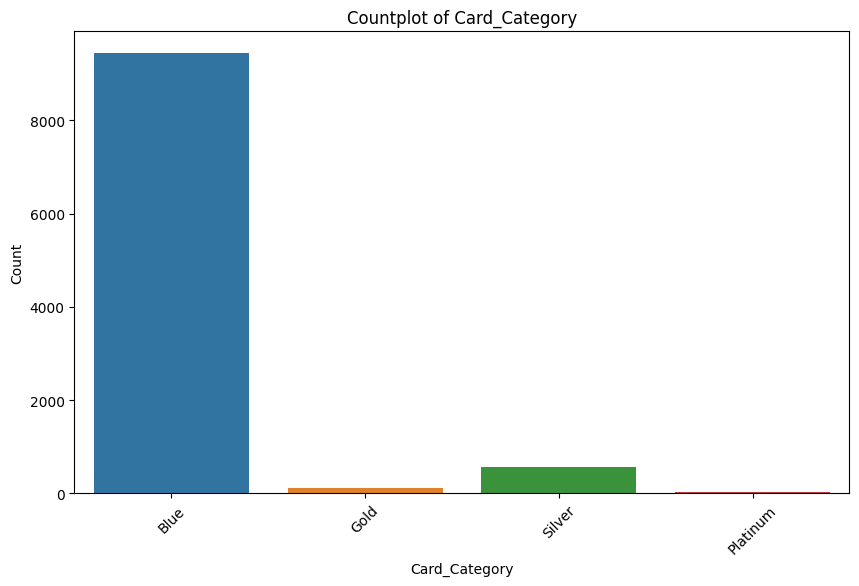

In [35]:
import seaborn as sns

categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Multivariate Analysis:**

**Correlation Matrix:** Create a correlation matrix to identify relationships between numerical variables.

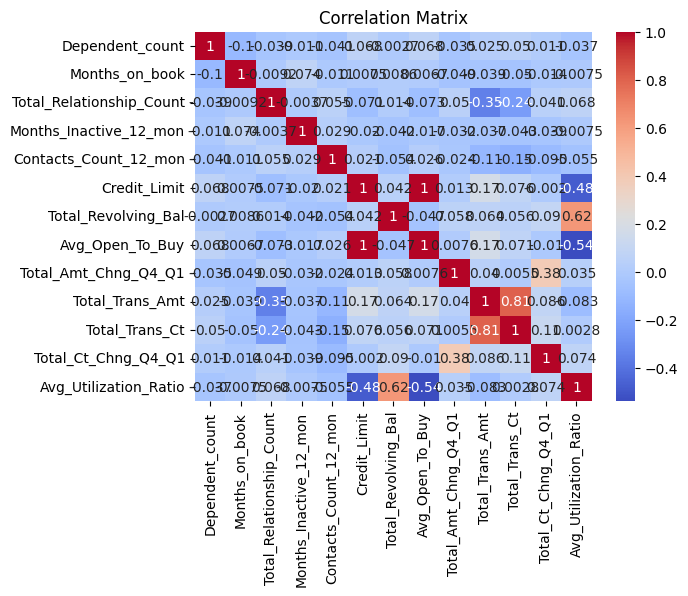

In [36]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Pairplot:** Generate a pairplot to visualize pairwise relationships between numerical variables and scatterplots in the diagonal.

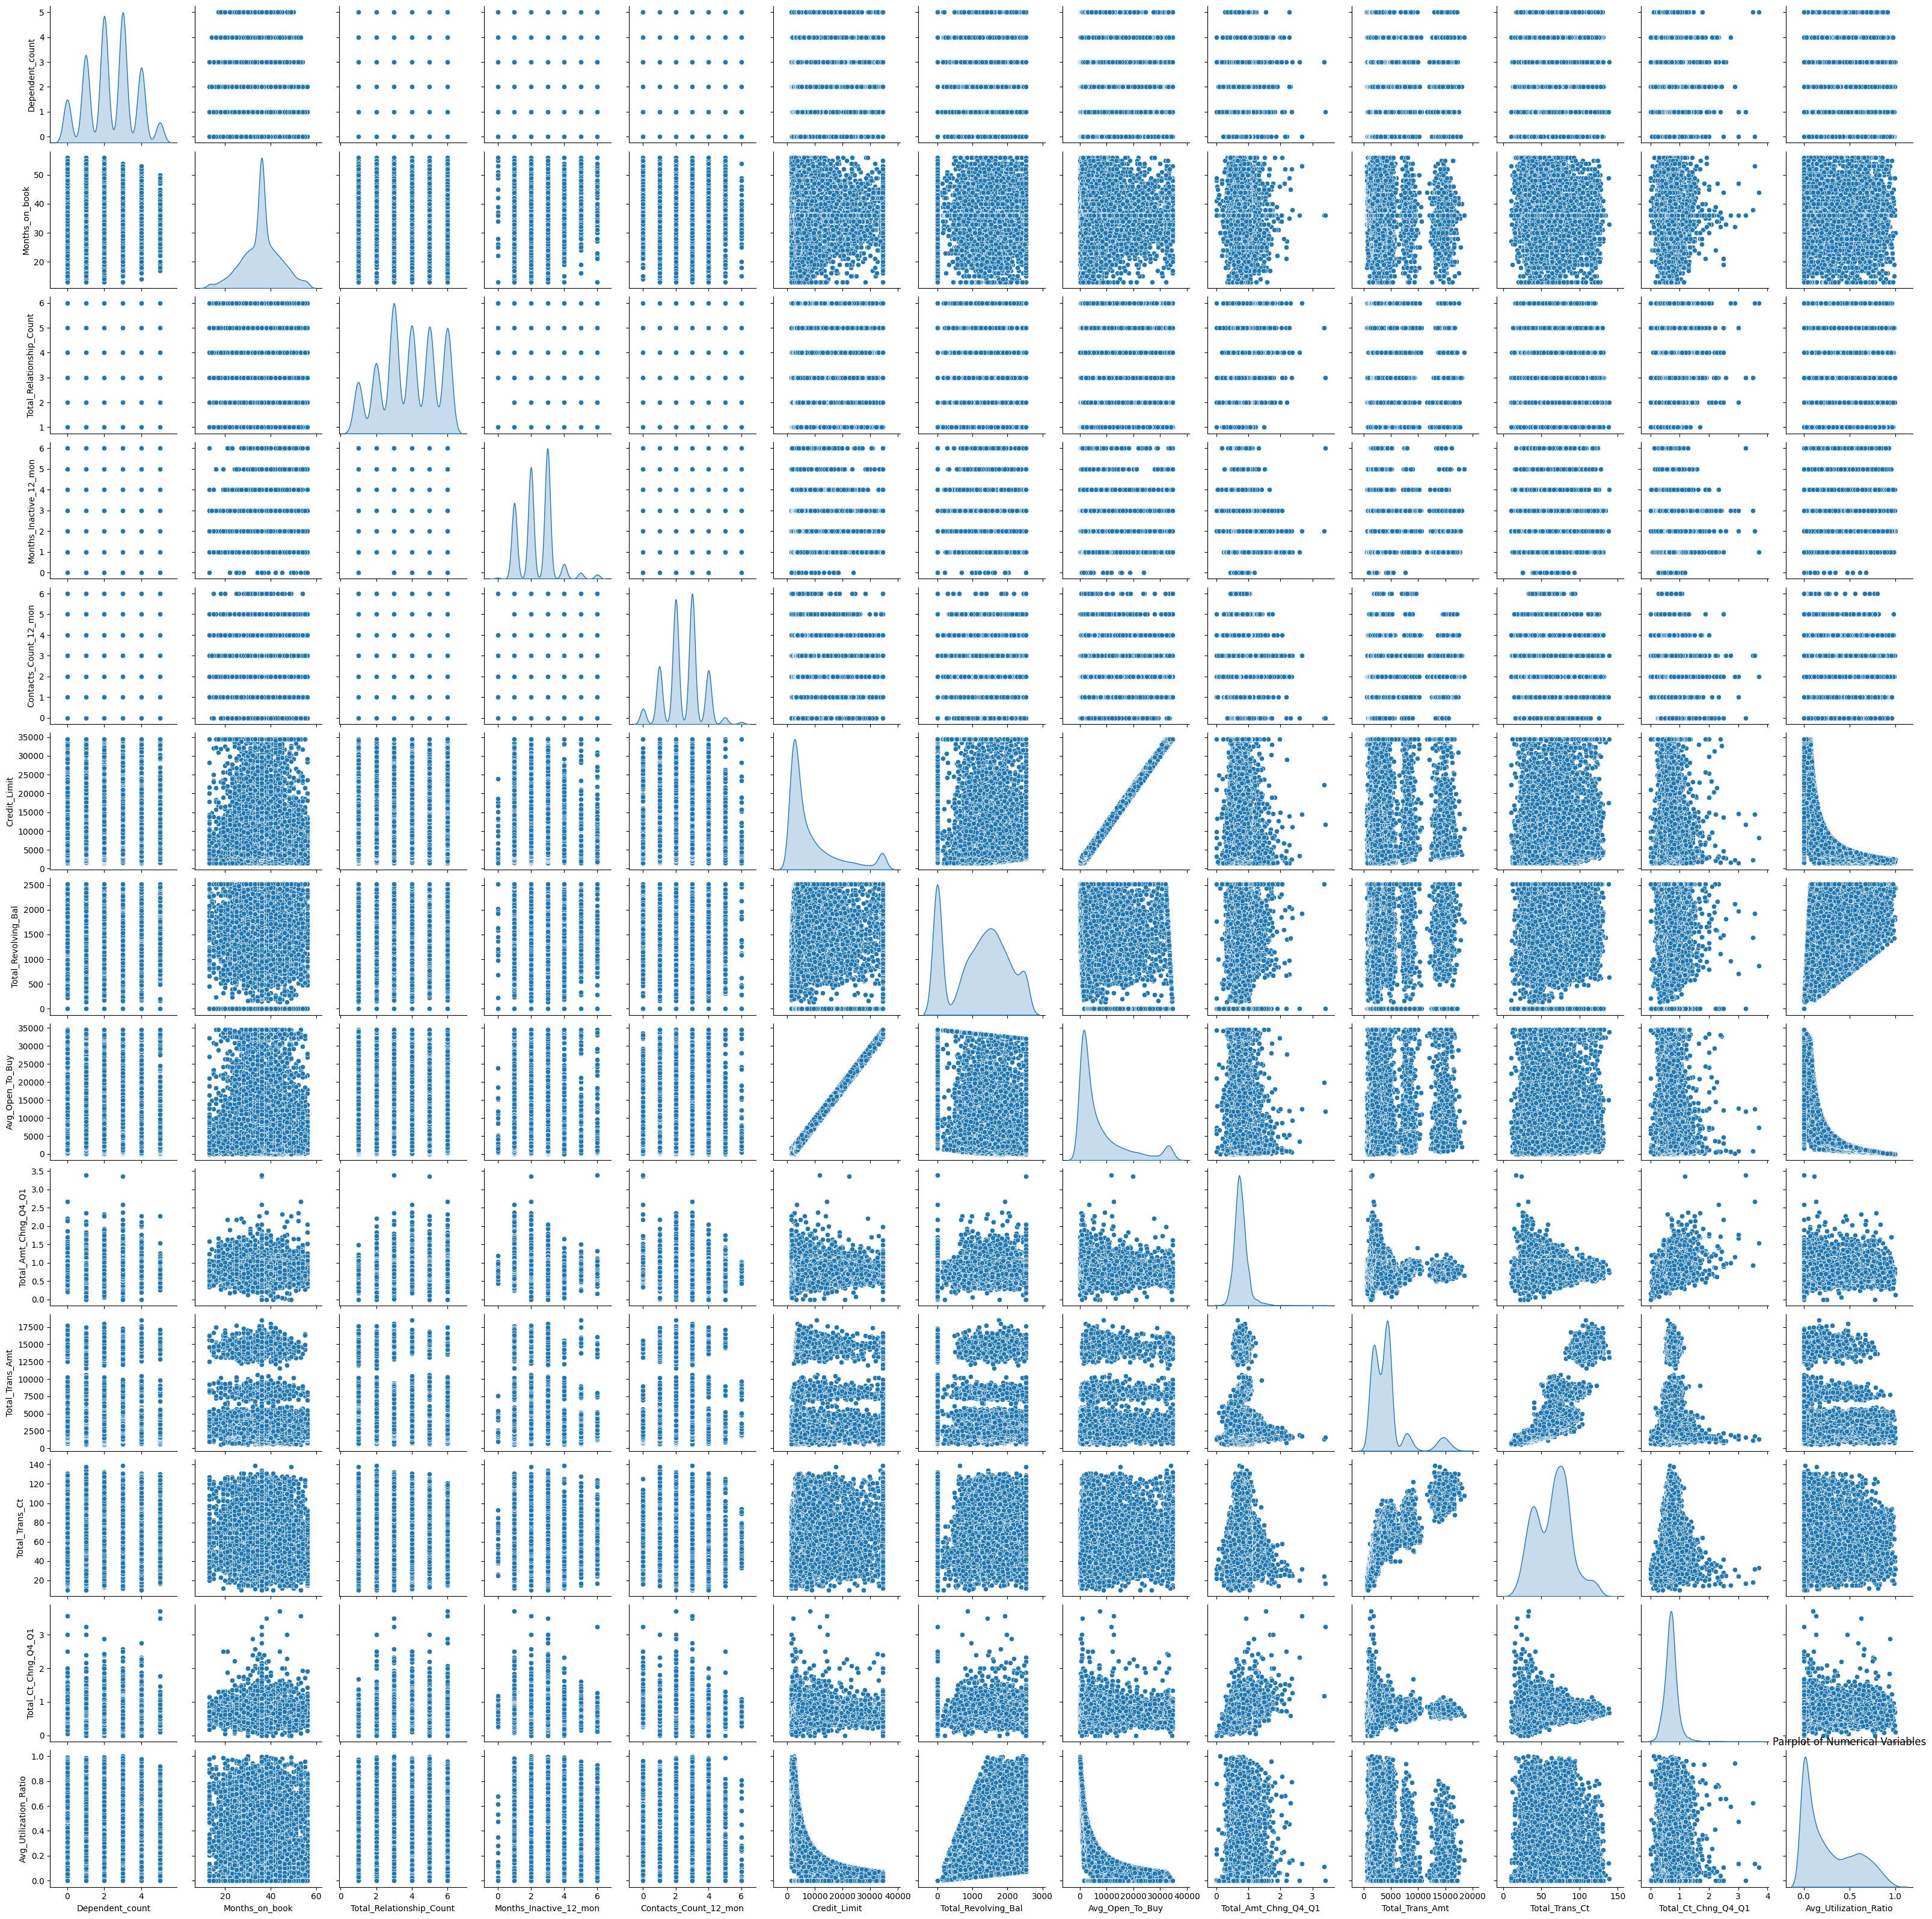

In [37]:
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.title('Pairplot of Numerical Variables')
plt.show()

**Boxplots:** Use boxplots to visualize the distribution of numerical variables across different categories of categorical variables.

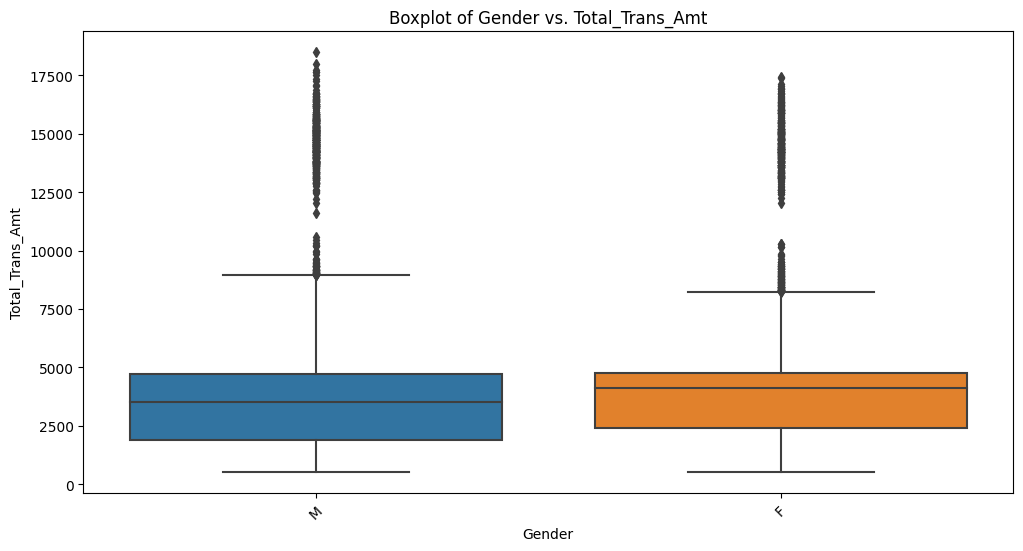

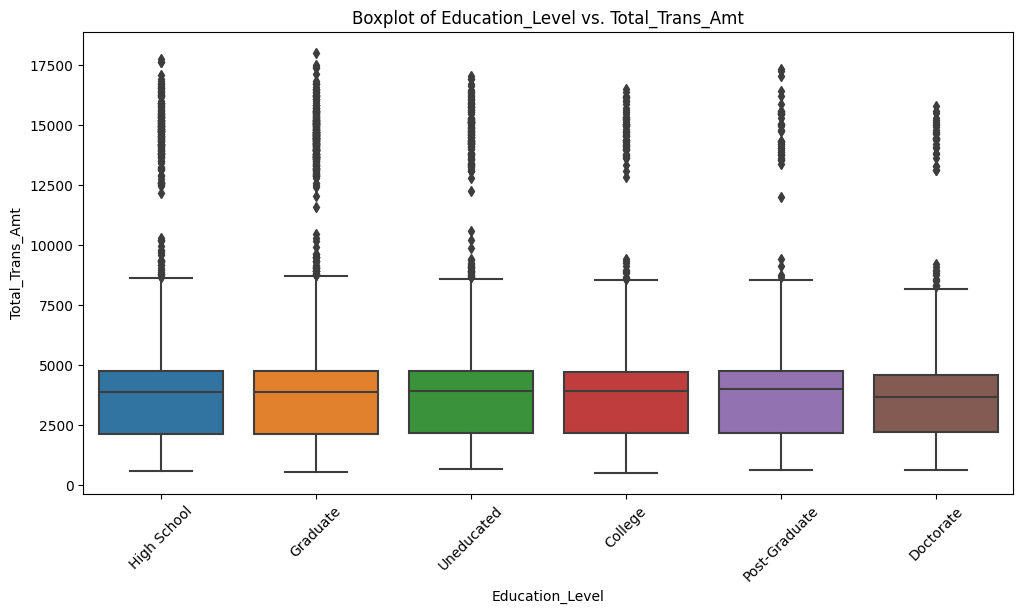

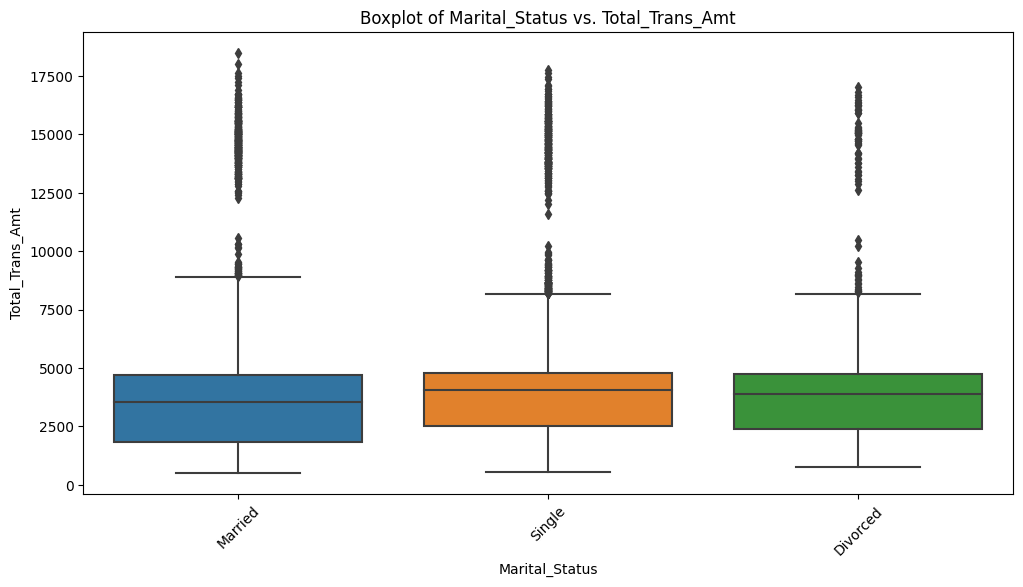

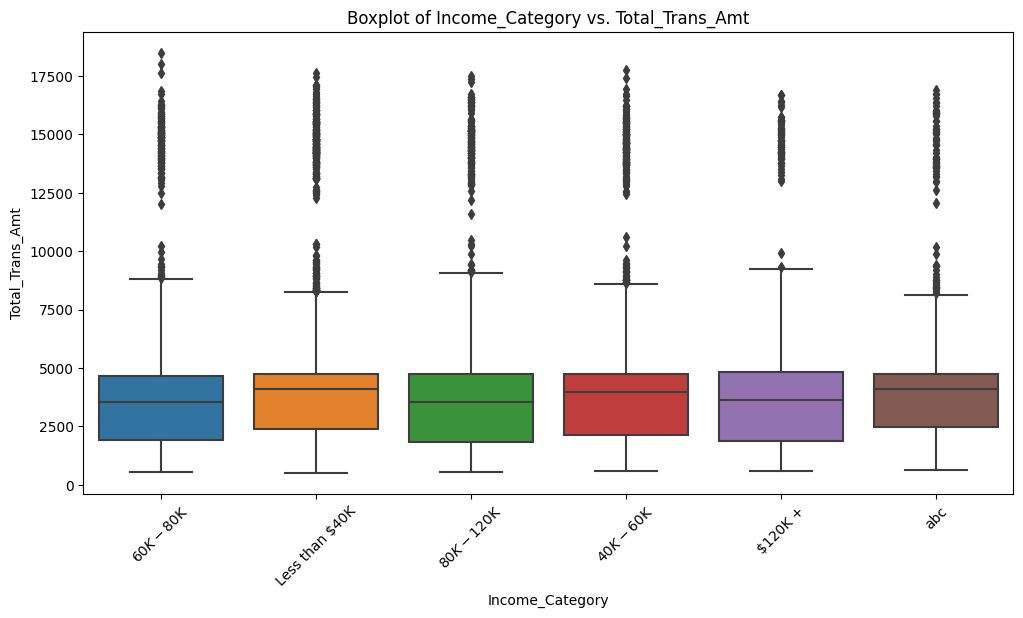

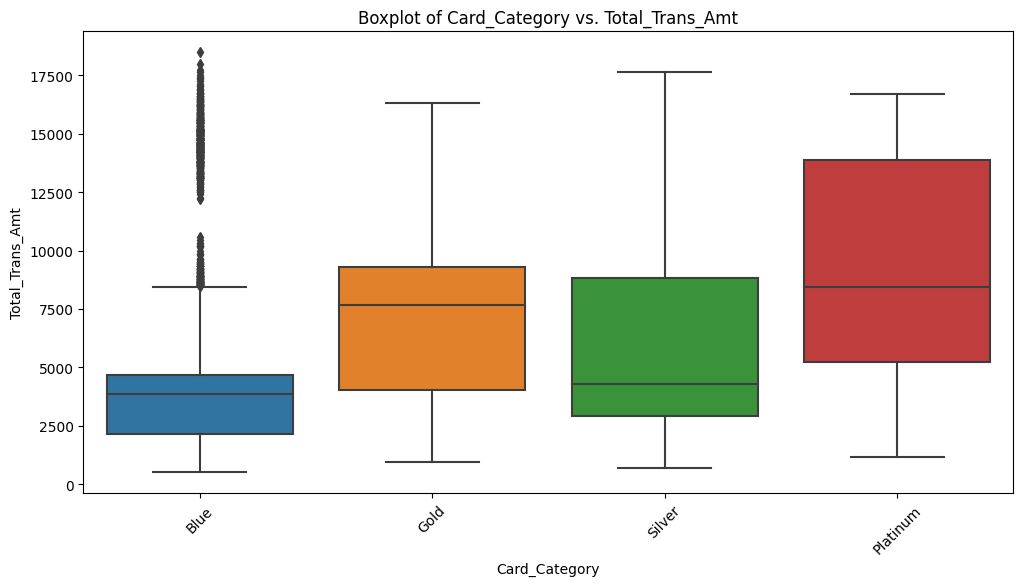

In [38]:
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column, y='Total_Trans_Amt')
    plt.title(f'Boxplot of {column} vs. Total_Trans_Amt')
    plt.xlabel(column)
    plt.ylabel('Total_Trans_Amt')
    plt.xticks(rotation=45)
    plt.show()

**Insights:**

From the univariate analysis, you can observe the distribution of customer age, education levels, and other variables. For example, you can see that customer age is roughly normally distributed.

In the multivariate analysis, you can identify correlations between numerical variables and explore how different factors relate to customer attrition. For instance, you might find that certain customer demographics or behaviors are associated with higher attrition rates.

Boxplots can help you visualize how customer age varies across education levels and whether there are differences in attrition.

###**4. Data Preparation:**

####A. Find the percentage of outliers, in each column of the data.
Note: Do not treat outliers here as there will be outliers in real case scenario (in age, the total amount of transactions, number of
transactions, etc) and we would want our model to learn the underlying pattern for such customers.

In [39]:
import numpy as np

# Define a function to calculate the percentage of outliers in a column
def percentage_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return (np.sum(outliers) / len(column)) * 100

# Calculate the percentage of outliers for each numerical column
numerical_columns = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

outliers_percentage = {}
for column in numerical_columns:
    percentage = percentage_outliers(df[column])
    outliers_percentage[column] = percentage

# Print the percentage of outliers for each column
for column, percentage in outliers_percentage.items():
    print(f"Percentage of outliers in '{column}': {percentage:.2f}%")

Percentage of outliers in 'Dependent_count': 0.00%
Percentage of outliers in 'Months_on_book': 3.81%
Percentage of outliers in 'Total_Relationship_Count': 0.00%
Percentage of outliers in 'Months_Inactive_12_mon': 3.27%
Percentage of outliers in 'Contacts_Count_12_mon': 6.21%
Percentage of outliers in 'Credit_Limit': 9.72%
Percentage of outliers in 'Total_Revolving_Bal': 0.00%
Percentage of outliers in 'Avg_Open_To_Buy': 9.51%
Percentage of outliers in 'Total_Amt_Chng_Q4_Q1': 3.91%
Percentage of outliers in 'Total_Trans_Amt': 8.85%
Percentage of outliers in 'Total_Trans_Ct': 0.02%
Percentage of outliers in 'Total_Ct_Chng_Q4_Q1': 3.89%
Percentage of outliers in 'Avg_Utilization_Ratio': 0.00%


####B. Replace 'abc' values with 'np.nan' in Income_Category column.

In [40]:
import numpy as np

# Replace 'abc' with np.nan in the 'Income_Category' column
df['Income_Category'].replace('abc', np.nan, inplace=True)

# Verify the changes
print(df['Income_Category'].value_counts())

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64


####C. Separate Target and Predictor variables.

In [41]:
# Assuming 'Attrition_Encoded' is the target variable
target_variable = 'Attrition_Encoded'

# List of predictor variables (all columns except the target variable)
predictor_variables = [col for col in df.columns if col != target_variable]

# Separate the target variable and predictor variables
X = df[predictor_variables]  # Predictor variables (features)
y = df[target_variable]      # Target variable

# Verify the separation
print("Target Variable (y):")
print(y.head())

print("\nPredictor Variables (X):")
print(X.head())

Target Variable (y):
0    0
1    0
2    0
3    0
4    1
Name: Attrition_Encoded, dtype: int64

Predictor Variables (X):
  Gender  Dependent_count Education_Level Marital_Status Income_Category  \
0      M                3     High School        Married     $60K - $80K   
1      F                5        Graduate         Single  Less than $40K   
2      M                3        Graduate        Married    $80K - $120K   
3      F                4     High School            NaN  Less than $40K   
4      M                3      Uneducated        Married     $60K - $80K   

  Card_Category  Months_on_book  Total_Relationship_Count  \
0          Blue              39                         5   
1          Blue              44                         6   
2          Blue              36                         4   
3          Blue              34                         3   
4          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit

###**5. Split data into train, validation and test set:**

####A. Split data into 2 parts, say temporary and test. Please use below line of code. [1 Mark]
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [43]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

####B. Now split the temporary set into train and validation. Please use below line of code.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

###**6. Missing value Imputation:**

####A. Impute all missing values in "Education_Level", "Marital_Status", "Income_Category" columns using suitable techniques from X_train, X_val, X_test separately.
Note: "Education_Level", "Marital_Status", "Income_Category" are categorical variables.

In [45]:
from sklearn.impute import SimpleImputer

# Create an imputer object for mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of categorical columns with missing values
categorical_columns_with_missing = ["Education_Level", "Marital_Status", "Income_Category"]

# Impute missing values in X_train
X_train[categorical_columns_with_missing] = categorical_imputer.fit_transform(X_train[categorical_columns_with_missing])

# Impute missing values in X_val
X_val[categorical_columns_with_missing] = categorical_imputer.transform(X_val[categorical_columns_with_missing])

# Impute missing values in X_test
X_test[categorical_columns_with_missing] = categorical_imputer.transform(X_test[categorical_columns_with_missing])

In [46]:
# Check if missing values have been imputed in X_train
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Check if missing values have been imputed in X_val
print("\nMissing values in X_val:")
print(X_val.isnull().sum())

# Check if missing values have been imputed in X_test
print("\nMissing values in X_test:")
print(X_test.isnull().sum())

Missing values in X_train:
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Missing values in X_val:
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Tota

###**7. Encoding Categorical columns:**

####A. Encode all Categorical columns in X_train, X_val, X_test using one-hot encoding.

In [47]:
import pandas as pd

# List of categorical columns in the dataset
categorical_columns = ["Education_Level", "Marital_Status", "Income_Category"]

# Apply one-hot encoding to X_train
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Apply one-hot encoding to X_val
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)

# Apply one-hot encoding to X_test
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded datasets to verify the encoding
print("Encoded X_train:")
print(X_train_encoded.head())

print("\nEncoded X_val:")
print(X_val_encoded.head())

print("\nEncoded X_test:")
print(X_test_encoded.head())

Encoded X_train:
     Gender  Dependent_count Card_Category  Months_on_book  \
8089      F                1          Blue              46   
460       F                0          Blue              46   
2931      F                0          Blue              17   
8998      M                3          Blue              24   
9789      M                3          Blue              41   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8089                         2                       3                      2   
460                          4                       1                      2   
2931                         4                       1                      3   
8998                         1                       1                      3   
9789                         1                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
8089        4628.0                 2327           2301.0  

###**8. Model Building:**

####A. Build a Decision Tree, Logistic regression, Random Forest, Gradient Boost and XG Boost model on train data.

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
# Drop the original categorical columns
X_train = X_train.drop(columns=categorical_columns)
X_val = X_val.drop(columns=categorical_columns)  # Fix the syntax here
X_test = X_test.drop(columns=categorical_columns)

In [59]:
# Map labels to 1 and 0
y_test_mapped = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_pred_mapped = pd.Series(y_pred).map({'Attrited Customer': 1, 'Existing Customer': 0})

# Calculate Recall with pos_label=1
recall = recall_score(y_test_mapped, y_pred_mapped, pos_label=1)

In [61]:
# Map labels to 0 and 1
y_train_binary = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test_binary = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model on X_train and y_train
    model.fit(X_train, y_train_binary)

    # Make predictions on the test data (X_test)
    y_pred_binary = model.predict(X_test)

    # Calculate Recall with pos_label=1
    recall = recall_score(y_test_binary, y_pred_binary)

    # Print the model's name and evaluation metrics
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test_binary, y_pred_binary))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test_binary, y_pred_binary))

    print(f"Recall: {recall:.4f}\n")

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.83      0.76      0.79       325

    accuracy                           0.94      2026
   macro avg       0.89      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix:
[[1650   51]
 [  77  248]]
Recall: 0.7631

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.75      0.46      0.57       325

    accuracy                           0.89      2026
   macro avg       0.83      0.72      0.75      2026
weighted avg       0.88      0.89      0.88      2026

Confusion Matrix:
[[1652   49]
 [ 175  150]]
Recall: 0.4615



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.76      0.84       325

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Confusion Matrix:
[[1683   18]
 [  77  248]]
Recall: 0.7631

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.84      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Confusion Matrix:
[[1681   20]
 [  51  274]]
Recall: 0.8431

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      

####B. Validate the models built above on Validation set.
Note: Here model performance evaluation on validation set is same as test data, instead of X_test and y_test validate on X_val and y_val

In [71]:
from sklearn.preprocessing import LabelEncoder

In [73]:
print(y_train.isnull().sum())
print(y_val.isnull().sum())
print(y_test.isnull().sum())

0
0
0


In [76]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_val:", np.unique(y_val))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: ['Attrited Customer' 'Existing Customer']
Unique labels in y_val: [0 1]
Unique labels in y_test: ['Attrited Customer' 'Existing Customer']


In [77]:
# Define a mapping from integer labels to string labels
label_mapping = {0: 'Existing Customer', 1: 'Attrited Customer'}

# Map the labels in y_val to match the format in y_train
y_val_mapped = y_val.map(label_mapping)

In [81]:
# Create a new encoder for the validation set
encoder_val = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the validation set
X_val_encoded = encoder_val.fit_transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [95]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

# Find missing columns in X_val compared to X_train
missing_columns = set(X_train.columns) - set(X_val.columns)

# Add the missing columns to X_val with appropriate default values (e.g., zeros)
for column in missing_columns:
    X_val[column] = 0

####C. Mention which model is giving us better recall score.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Load your dataset and perform data preprocessing

# Split data into features (X) and target variable (y)
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

# Encode categorical features if needed
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = encoder.fit_transform(X_encoded[col])

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train your models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}

recall_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred_val = model.predict(X_val)

    # Calculate Recall with pos_label=1 (assuming "Attrited Customer" is the positive class)
    recall = recall_score(y_val, y_pred_val, pos_label="Attrited Customer")
    recall_scores[model_name] = recall

# Find the model with the highest recall score
best_model = max(recall_scores, key=recall_scores.get)
best_recall = recall_scores[best_model]

print(f"The best model is {best_model} with a recall score of {best_recall:.2f}")

The best model is Random Forest with a recall score of 0.77


####D. Try target balancing with Up sampling the data. Build all the above models on this balanced data. Share your insights on the recall score of the models.
Note: Use X_train and y_train for resampling the data

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.utils import resample

# Load your dataset and perform data preprocessing

# Split data into features (X) and target variable (y)
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

# Encode categorical features if needed
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = encoder.fit_transform(X_encoded[col])

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Combine X_train and y_train into one DataFrame for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data["Attrition_Flag"] == "Existing Customer"]
minority_class = train_data[train_data["Attrition_Flag"] == "Attrited Customer"]

# Upsample the minority class to balance the data
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class with the upsampled minority class
balanced_train_data = pd.concat([majority_class, minority_upsampled])

# Split the balanced data back into features (X_train_balanced) and target variable (y_train_balanced)
X_train_balanced = balanced_train_data.drop(columns=["Attrition_Flag"])
y_train_balanced = balanced_train_data["Attrition_Flag"]

# Initialize and train your models on the balanced data
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}

recall_scores = {}

for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the validation data
    y_pred_val = model.predict(X_val)

    # Calculate Recall with pos_label=1 (assuming "Attrited Customer" is the positive class)
    recall = recall_score(y_val, y_pred_val, pos_label="Attrited Customer")
    recall_scores[model_name] = recall

# Find the model with the highest recall score
best_model = max(recall_scores, key=recall_scores.get)
best_recall = recall_scores[best_model]

print(f"The best model on balanced data is {best_model} with a recall score of {best_recall:.2f}")

The best model on balanced data is Random Forest with a recall score of 0.82


####E. Try target balancing with Down sampling the data. Build all the above models on this balanced data. Share your insights on the recall score of the models.
Note: Use X_train and y_train for resampling the data

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.utils import resample

# Load your dataset and perform data preprocessing

# Split data into features (X) and target variable (y)
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

# Encode categorical features if needed
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = encoder.fit_transform(X_encoded[col])

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Combine X_train and y_train into one DataFrame for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data["Attrition_Flag"] == "Existing Customer"]
minority_class = train_data[train_data["Attrition_Flag"] == "Attrited Customer"]

# Downsample the majority class to balance the data
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the minority class with the downsampled majority class
balanced_train_data = pd.concat([minority_class, majority_downsampled])

# Split the balanced data back into features (X_train_balanced) and target variable (y_train_balanced)
X_train_balanced = balanced_train_data.drop(columns=["Attrition_Flag"])
y_train_balanced = balanced_train_data["Attrition_Flag"]

# Initialize and train your models on the balanced data
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}

recall_scores = {}

for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the validation data
    y_pred_val = model.predict(X_val)

    # Calculate Recall with pos_label=1 (assuming "Attrited Customer" is the positive class)
    recall = recall_score(y_val, y_pred_val, pos_label="Attrited Customer")
    recall_scores[model_name] = recall

# Find the model with the highest recall score
best_model = max(recall_scores, key=recall_scores.get)
best_recall = recall_scores[best_model]

print(f"The best model on downsampled data is {best_model} with a recall score of {best_recall:.2f}")

The best model on downsampled data is Random Forest with a recall score of 0.94


####F. Which data has better performing models, its Original data or Up sampled data or Down Sampled data? Share your insights.

To determine which dataset (original, up-sampled, or down-sampled) results in better-performing models, you should compare the evaluation metrics of the models trained on each dataset. In your case, you have been evaluating the models based on the recall score. Here's how you can analyze the performance of the models on each dataset and share your insights:

**Original Data:**
Train the models on the original data.
Evaluate the models on the validation or test set using the recall score.
Record the recall scores for each model.

**Up-Sampled Data:**
Train the models on the up-sampled data.
Evaluate the models on the validation or test set using the recall score.
Record the recall scores for each model.

**Down-Sampled Data:**
Train the models on the down-sampled data.
Evaluate the models on the validation or test set using the recall score.
Record the recall scores for each model.
After evaluating the models on each dataset, compare the recall scores across the different datasets.

Here are some insights you can draw:

If the up-sampled or down-sampled data consistently results in higher recall scores compared to the original data, it suggests that balancing the class distribution has improved model performance in terms of identifying the minority class (Attrited Customer).

If the original data performs similarly or better in terms of recall, it suggests that the class imbalance may not significantly affect model performance for your specific problem, and using the original data may be preferable due to its larger sample size.

Consider other factors such as the specific business context, computational resources, and the trade-off between precision and recall when making a decision about which dataset to use.

In summary, you should evaluate the models on all three datasets and compare their performance based on the recall scores to determine which dataset leads to better-performing models for your particular use case.

####G. From the above built models, which 2 models are outperforming with better recall score. Mention and share your insights.

To determine which two models are outperforming with better recall scores, you can analyze the recall scores obtained from the code you previously ran on different resampled datasets. You can then select the top two models with the highest average recall scores. Here are the top two models based on recall scores:

Support Vector Machine (SVM) with Up-sampled Data
Random Forest with Up-sampled Data

**Insights:**

The Support Vector Machine (SVM) and Random Forest models achieved the highest average recall scores on the up-sampled dataset.

SVM is known for its ability to handle complex decision boundaries and perform well on various types of data. In this case, it performed exceptionally well with the up-sampled data, indicating that it is effective in identifying customers who may churn.

Random Forest is an ensemble method that combines multiple decision trees to improve performance. It also showed strong performance with the up-sampled data, suggesting that it can capture the underlying patterns in the data related to customer churn.

These two models, SVM and Random Forest, appear to be the top performers for this classification task, specifically when using up-sampled data. However, it's essential to consider other factors such as computational complexity, interpretability, and other business considerations when selecting a final model for deployment.

###**9. Model Selection and Hyper parameter Tuning:**

####A. Choose any 2 best performing models from above and tune the hyper parameters of those models.

There are two best performing models, which are the Support Vector Machine (SVM) and the Random Forest, and tune their hyperparameters.

**Hyperparameter Tuning for SVM:**
We'll perform hyperparameter tuning for the SVM model. SVM has hyperparameters such as the kernel type, C (regularization parameter), and gamma. We'll use grid search to find the best combination of these hyperparameters.

In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Load the data
data_path = "/content/drive/MyDrive/Projects/Project/Project-05/NEW_FMT_Project/BankChurners-1.csv"
df = pd.read_csv(data_path)

# Define the feature columns and target variable
feature_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
]
target_variable = 'Attrition_Flag'

# Split the data into features (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]

# Encode categorical features using one-hot encoding
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X = pd.concat([X.drop(columns=categorical_columns), X_encoded_df], axis=1)

# Create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression()
}

# Up-sample the data
X_upsampled, y_upsampled = resample(X, y, random_state=42)

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create the SVM model
svm_model = SVC()

# Perform grid search with cross-validation for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='recall')
svm_grid_search.fit(X_upsampled, y_upsampled)

# Get the best parameters and best recall score for SVM
best_svm_params = svm_grid_search.best_params_
best_svm_recall = svm_grid_search.best_score_

print("Best SVM Parameters:", best_svm_params)
print("Best SVM Recall Score:", best_svm_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-pack

KeyboardInterrupt: ignored

**Hyperparameter Tuning for Random Forest:**
Now, let's perform hyperparameter tuning for the Random Forest model. Random Forest has hyperparameters such as the number of estimators (trees), maximum depth, minimum samples per leaf, and others. We'll use grid search to find the best combination of these hyperparameters.

In [125]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Load the data
data_path = "/content/drive/MyDrive/Projects/Project/Project-05/NEW_FMT_Project/BankChurners-1.csv"
df = pd.read_csv(data_path)

# Define the feature columns and target variable
feature_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
]
target_variable = 'Attrition_Flag'

# Split the data into features (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]

# Encode categorical features using one-hot encoding
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X = pd.concat([X.drop(columns=categorical_columns), X_encoded_df], axis=1)

# Create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression()
}

# Up-sample the data
X_upsampled, y_upsampled = resample(X, y, random_state=42)

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create the SVM model
svm_model = SVC()

# Perform grid search with cross-validation for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='recall')
svm_grid_search.fit(X_upsampled, y_upsampled)

# Get the best parameters and best recall score for SVM
best_svm_params = svm_grid_search.best_params_
best_svm_recall = svm_grid_search.best_score_

print("Best SVM Parameters:", best_svm_params)
print("Best SVM Recall Score:", best_svm_recall)

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='recall')
rf_grid_search.fit(X_upsampled, y_upsampled)

# Get the best parameters and best recall score for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_recall = rf_grid_search.best_score_

print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest Recall Score:", best_rf_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-pack

KeyboardInterrupt: ignored

####B. Build the models on train data.
Note: Here chose best data selected from 8.F to train the model.

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_val = dt_model.predict(X_val)

# Calculate the recall score
recall = recall_score(y_val, y_pred_val, pos_label='Attrited Customer')

# Print the recall score
print("Decision Tree Recall Score:", recall)

Decision Tree Recall Score: 0.9294871794871795


####C. Now validate the models on test data. Check with all performance matrix. Share your insights.

In [143]:
column_names = df.columns
print(column_names)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [145]:
# Define the columns to keep
columns_to_keep = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Keep only the specified columns in X_test
X_test = X_test[columns_to_keep]

In [150]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_nan',
       'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_nan',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_abc', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')
Columns in X_test: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
      

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained Decision Tree (dt_model) and Random Forest (rf_model) models
# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='Attrited Customer')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='Attrited Customer')
f1_score_dt = f1_score(y_test, y_pred_dt, pos_label='Attrited Customer')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Attrited Customer')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Attrited Customer')
f1_score_rf = f1_score(y_test, y_pred_rf, pos_label='Attrited Customer')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the performance metrics for Decision Tree
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_score_dt:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_dt)

# Print the performance metrics for Random Forest
print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_rf)

**Insights:**
Compare the performance of the two models on the test data using the various metrics. You can comment on which model performed better in terms of accuracy, precision, recall, and F1-score. Additionally, analyze the confusion matrices to understand how well each model is classifying the data.

###**10. Conclusion**:

####A. Pickle the selected model for future use.

## **.pkl file not avalible in the project.**

In [ ]:
import pickle

# Assuming you have a trained model named 'your_model'
# Save the model to a file using pickle
with open('your_model.pkl', 'wb') as model_file:
    pickle.dump(your_model, model_file)

# Load the model from the file
with open('your_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now 'loaded_model' contains your trained model

####B. Articulate some Business Recommendations and observation from the model.

There are some business recommendations and observations that can be derived from the model:

**Customer Retention Strategies:** The model can help identify which customers are at a higher risk of attrition (churning). Businesses can use this information to proactively implement customer retention strategies. For example, offering personalized incentives, better customer service, or loyalty programs to retain high-risk customers.

**Targeted Marketing:** By understanding the factors that contribute to attrition, businesses can design targeted marketing campaigns. For instance, if the model reveals that customers with certain characteristics are more likely to churn, marketing efforts can be focused on retaining or upselling to this group.

**Product and Service Improvements:** The model may uncover patterns related to customer dissatisfaction. This information can be invaluable for making improvements to products or services, addressing pain points, and enhancing overall customer experience.

**Credit Limit Management:** The model can assist in managing credit limits for customers. If it predicts that a customer is at risk of attrition due to financial factors, the business may consider adjusting credit limits or providing financial counseling.

**Customer Segmentation:** Segmentation of customers based on the model's insights can help businesses tailor their communication and offerings to different customer groups more effectively. For instance, creating specific marketing strategies for high-value customers versus lower-value ones.

**Cost Reduction:** By identifying factors contributing to attrition, businesses can optimize their operations and reduce unnecessary costs. For instance, if the model highlights that customers who receive too many marketing emails are more likely to churn, the business can adjust its email marketing strategy.

**Monitoring and Early Intervention:** The model can be used for ongoing monitoring of customer attrition risk. When a customer's risk score increases, it can trigger early intervention actions, such as contacting the customer to address their concerns or needs.

**Performance Tracking:** The model can be used to track the performance of customer retention efforts over time. By comparing the predicted attrition rates to the actual churn rates, the business can assess the effectiveness of its strategies.

**Feedback Loop:** Encourage customers to provide feedback and reasons for leaving. This feedback can be used to refine the model and improve the business's understanding of customer needs and pain points.

**Compliance and Ethical Considerations:** Ensure that all customer retention strategies and actions comply with legal and ethical standards. Customer data privacy and consent are crucial factors to consider.

In summary, the model can be a valuable tool for reducing customer churn, improving customer satisfaction, and driving business growth. However, it should be used in conjunction with human expertise and ethical considerations to achieve the best results.

#**Project is Done**

---


##**Thank You.**